In [43]:
# ipywidgets pip install 필요
import ipywidgets as widgets # 버튼등 위젯용 라이브러리
from IPython.display import display, clear_output
from PIL import Image as PILImage
import io
from torchvision import transforms

FileUpload(value=({'name': 'hamburger.jpg', 'type': 'image/jpeg', 'size': 428919, 'content': <memory at 0x0000…

{'name': 'hamburger.jpg', 'type': 'image/jpeg', 'size': 428919, 'content': <memory at 0x0000023632F84340>, 'last_modified': datetime.datetime(2025, 1, 16, 3, 1, 46, 968000, tzinfo=datetime.timezone.utc)}


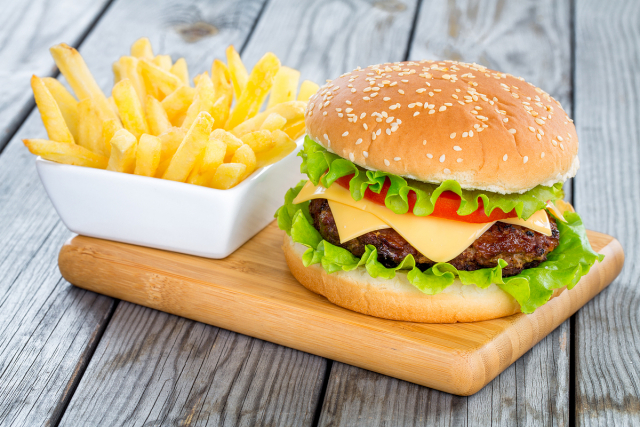

In [44]:
# 파일 업로드 위젯 생성
upload_widget = widgets.FileUpload(
    accept='image/*', # 이미지 파일
    multiple=False # 여러 파일 업로드 불가
)

image = None # 글로벌 변수 지정
# 업로드된 파일 처리 함수
def on_upload_change(change):
    if upload_widget.value:
        global image

        clear_output(wait=True) # 콘솔 화면 지우기
        display(upload_widget) # 지워진 콘솔에 위젯 다시 표시

        uploaded_file = upload_widget.value[0] # 파일 가져오기

        # 이미지 파일 데이터를 읽어서 화면에 표시
        print(uploaded_file)
        image_data = uploaded_file['content']
        image = PILImage.open(io.BytesIO(image_data))
        display(image)  # 이미지를 화면에 표시

# 코드 진행단
display(upload_widget) # 위젯 화면에 표시
upload_widget.observe(on_upload_change, names='value')

In [46]:
# 이미지 데이터를 텐서로 변환하는 함수
def image_to_tensor(image):
    transform = transforms.Compose([
        transforms.ToTensor(),  # 이미지를 텐서로 변환
    ])
    tensor = transform(image)  # 이미지 변환
    return tensor

print(image)
image_tensor = image_to_tensor(image)  # 이미지를 텐서로 변환
print("이미지 텐서 형태:", image_tensor.shape)  # 텐서의 크기 출력
print("이미지 텐서:", image_tensor)  # 텐서의 크기 출력

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427 at 0x2363A1C82F0>
이미지 텐서 형태: torch.Size([3, 427, 640])
이미지 텐서: tensor([[[0.8471, 0.8471, 0.8510,  ..., 0.6824, 0.7059, 0.7137],
         [0.8471, 0.8510, 0.8510,  ..., 0.6902, 0.7098, 0.7137],
         [0.8510, 0.8549, 0.8627,  ..., 0.7020, 0.7098, 0.7098],
         ...,
         [0.3098, 0.7294, 0.8392,  ..., 0.7686, 0.7373, 0.7098],
         [0.5922, 0.8353, 0.8275,  ..., 0.7569, 0.7647, 0.7059],
         [0.8706, 0.8235, 0.8549,  ..., 0.7843, 0.7765, 0.7569]],

        [[0.8824, 0.8824, 0.8863,  ..., 0.7333, 0.7451, 0.7529],
         [0.8824, 0.8863, 0.8863,  ..., 0.7412, 0.7451, 0.7529],
         [0.8863, 0.8902, 0.8980,  ..., 0.7412, 0.7490, 0.7490],
         ...,
         [0.3333, 0.7608, 0.8667,  ..., 0.8118, 0.7804, 0.7412],
         [0.6196, 0.8863, 0.8784,  ..., 0.8000, 0.7961, 0.7490],
         [0.8980, 0.8745, 0.8902,  ..., 0.8196, 0.8196, 0.7961]],

        [[0.9176, 0.9176, 0.9216,  ..., 0.7647, 0.7804, 0.7882